--- In this example we look at the properties of one of the sources identified by segmentation.

In [1]:
import numpy as np
from astropy.io import fits

In [2]:
image_dir = 'data' # define image directory relative to this script

In [3]:
f = 'f125w' # filter

In [4]:
sci = fits.getdata(f'{image_dir}/{f}_sci.fits') # read science FITS file data into numpy array
wht = fits.getdata(f'{image_dir}/{f}_wht.fits') # read weight FITS file data into numpy array

In [5]:
mask = fits.getdata(f'{image_dir}/mask.fits') # read in the image mask
sci = np.ma.masked_array(sci, mask = mask) # apply the mask to our science image
wht = np.ma.masked_array(wht, mask = mask) # apply the mask to our weight image

--- cut out a portion of the image for analysis

In [6]:
x = 2500 # pixel x-centre of cutout, must be an integer
y = 2500 # pixel y-centre of cutout, must be an integer
r = 100 # width/2 of cutout, must be int

In [7]:
sci = sci[x-r:x+r, y-r:y+r] # cutout a portion of the science image
wht = wht[x-r:x+r, y-r:y+r] # cutout a portion of the weight image

--- define the noise in each pixel and make a significance map (signal/noise)

In [8]:
noise = 1./np.sqrt(wht) # conversion from weight to noise
sig = sci/noise # signifance map

--- now run segmentation on the image.

In [9]:
from photutils import detect_sources
import matplotlib.pyplot as plt

In [10]:
threshold = 2.5 # require each pixel have a significance of >2.5 (since we're using the significance image)
npixels = 5 # require at least 5 connected pixels

In [11]:
segm = detect_sources(sig, threshold, npixels=npixels) # make segmentation image

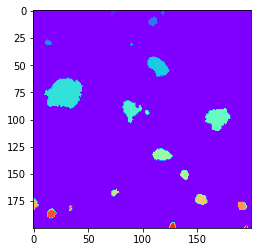

In [12]:
plt.imshow(segm, cmap = 'rainbow') # plot masked segmentation map
plt.show()

--- calculate object positions

In [13]:
from photutils import SourceCatalog

In [14]:
cat = SourceCatalog(sci, segm)
positions = [np.transpose((obj.xcentroid, obj.ycentroid)) for obj in cat]

--- display single object

In [15]:
i = 8

In [16]:
mask = ~((segm.data==i)|(segm.data==0)) # only background + object
# mask = segm.data!=i # only object
masked_segm = np.ma.array(segm, mask = mask) # mask all pixels except object i

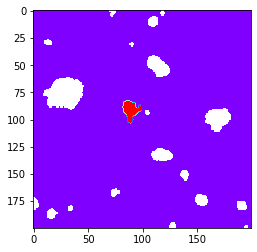

In [17]:
plt.imshow(masked_segm, cmap = 'rainbow') # plot masked segmentation map
plt.show()

In [18]:
from photutils import CircularAperture

In [19]:
radii = np.arange(1,21,1)
apertures = [CircularAperture(positions[i-1], r=r) for r in radii]

In [20]:
from photutils import aperture_photometry

In [21]:
phot_table = aperture_photometry(sci, apertures, mask = mask)
print(phot_table)

 id      xcenter           ycenter      ...  aperture_sum_18   aperture_sum_19  
           pix               pix        ...                                     
--- ----------------- ----------------- ... ----------------- ------------------
  1 88.60878709373883 90.44619219580102 ... 4.350220716379615 4.3722783505714755
